In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

c:\Users\Mohammed Ammaruddin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# pip install nltk

In [3]:
df=pd.read_csv('walmart_reviews.csv')

In [4]:
df.head(5)

,Unnamed: 0,reviews
0,0,"4 out of 5 stars reviewGreat features, able to..."
1,1,1 out of 5 stars reviewBlack dot on screenJust...
2,2,5 out of 5 stars review8/8/2023TV is so simple...
3,3,5 out of 5 stars review6/1/2023Incredible Ease...
4,4,5 out of 5 stars review4/29/2023it connects so...


In [5]:
# df.reviews[0]

In [6]:
df.rating=df.reviews[0]

In [7]:
df['Rating'] = df['reviews'].str.extract(r'(\d+(\.\d+)?) out of 5 stars')[0]

In [8]:
df['reviews'] = df['reviews'].str.slice(start=23)


In [9]:
 df.head()

,Unnamed: 0,reviews,Rating
0,0,"Great features, able to play Xbox without cons...",4
1,1,Black dot on screenJust purchase this tv and a...,1
2,2,8/8/2023TV is so simple to use.[This review wa...,5
3,3,6/1/2023Incredible Ease of navigation[This rev...,5
4,4,4/29/2023it connects so seamlessly with my sam...,5


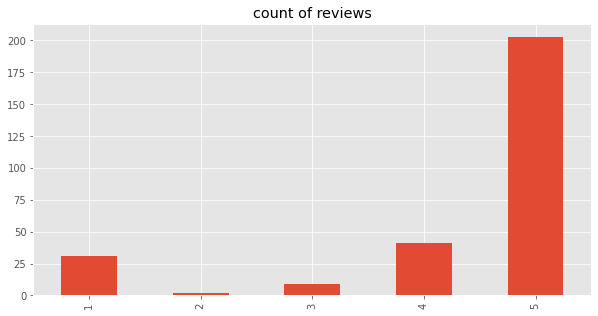

In [10]:
r=df['Rating'].value_counts().sort_index().plot(kind='bar',title= 'count of reviews',figsize=(10,5))


In [11]:
example=df.reviews[282]
# print(example)

In [12]:
df2 = df.copy()

In [13]:
 df2.head()

,Unnamed: 0,reviews,Rating
0,0,"Great features, able to play Xbox without cons...",4
1,1,Black dot on screenJust purchase this tv and a...,1
2,2,8/8/2023TV is so simple to use.[This review wa...,5
3,3,6/1/2023Incredible Ease of navigation[This rev...,5
4,4,4/29/2023it connects so seamlessly with my sam...,5


In [14]:
# Define a function to remove the first 8 characters from reviews that start with a number
def remove_first_8_characters(review):
    if review and review[0].isdigit():
        return review[8:]
    else:
        return review


df2['reviews'] = df2['reviews'].apply(remove_first_8_characters)

# Display the DataFrame
print(df2)

     Unnamed: 0                                            reviews Rating
0             0  Great features, able to play Xbox without cons...      4
1             1  Black dot on screenJust purchase this tv and a...      1
2             2  TV is so simple to use.[This review was collec...      5
3             3  Incredible Ease of navigation[This review was ...      5
4             4  3it connects so seamlessly with my samsung ear...      5
..          ...                                                ...    ...
281         281  22It has been a great tv since day one[This re...      5
282         282  22great quality at a great price[This review w...      5
283         283  2Happy with the clear display[This review was ...      5
284         284  2Solid tv for avg person[This review was colle...      4
285         285  2Great, but blurry at night.[This review was c...      5

[286 rows x 3 columns]


In [15]:
# df2['reviews'] = df2['reviews'].str.replace(r'[This review was collected as part of a promotion.]', '')
df2['reviews'] = df2['reviews'].str.replace('[This review was collected as part of a promotion.]', '', regex=False)

In [16]:
df2.head()

,Unnamed: 0,reviews,Rating
0,0,"Great features, able to play Xbox without cons...",4
1,1,Black dot on screenJust purchase this tv and a...,1
2,2,TV is so simple to use. This Samsung Crystal U...,5
3,3,Incredible Ease of navigation For someone bein...,5
4,4,3it connects so seamlessly with my samsung ear...,5


In [17]:
df3=df2

In [18]:
 df3.head()

,Unnamed: 0,reviews,Rating
0,0,"Great features, able to play Xbox without cons...",4
1,1,Black dot on screenJust purchase this tv and a...,1
2,2,TV is so simple to use. This Samsung Crystal U...,5
3,3,Incredible Ease of navigation For someone bein...,5
4,4,3it connects so seamlessly with my samsung ear...,5


In [19]:
df3['reviews'] = df3['reviews'].str.replace(r'^\d+\s*', '', regex=True)


In [20]:
# df3.reviews[282]


In [21]:
example=df3.reviews[282]
# print(example)

In [22]:
 print(df3)

     Unnamed: 0                                            reviews Rating
0             0  Great features, able to play Xbox without cons...      4
1             1  Black dot on screenJust purchase this tv and a...      1
2             2  TV is so simple to use. This Samsung Crystal U...      5
3             3  Incredible Ease of navigation For someone bein...      5
4             4  it connects so seamlessly with my samsung earb...      5
..          ...                                                ...    ...
281         281  It has been a great tv since day one My family...      5
282         282  great quality at a great price I have an older...      5
283         283  Happy with the clear display I purchased my 43...      5
284         284  Solid tv for avg person So I have the 7000 ser...      4
285         285  Great, but blurry at night. Like I said, it is...      5

[286 rows x 3 columns]


In [23]:
tokens=nltk.word_tokenize(example)
# tokens

In [24]:
# nltk.download('punkt')

In [25]:
# nltk.download('averaged_perceptron_tagger')

In [26]:
tags=nltk.pos_tag(tokens)
# tags

In [27]:
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# pip install svgling

In [28]:
# import svgling

In [29]:
# chnk=nltk.chunk.ne_chunk(tags)
# chnk

In [30]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Mohammed
[nltk_data]     Ammaruddin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [32]:
# sia

In [33]:
# sia.polarity_scores('this thing is very good')

In [34]:
# sia.polarity_scores('you are worst')

In [35]:
# sia.polarity_scores(example)

In [36]:
res={}
for i,row in tqdm(df3.iterrows(),total=len(df3)):
    text=row['reviews']
    myid=row['Unnamed: 0']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/286 [00:00<?, ?it/s]

In [37]:
vaders=pd.DataFrame(res).T
# vaders

In [38]:
#vaders=vaders.rename(columns={'index':'Unnamed: 0'})
Vaders = pd.merge(df3, vaders, left_index=True, right_index=True)
#vaders= vaders.merge(df3,left_on=None)

#vaders

In [39]:
# Vaders.head()

In [40]:
Vaders=Vaders.rename(columns={'Unnamed: 0':'index'})
#vaders=vaders.drop(columns=['level_0'])
Vaders

,index,reviews,Rating,neg,neu,pos,compound
0,0,"Great features, able to play Xbox without cons...",4,0.036,0.776,0.188,0.9364
1,1,Black dot on screenJust purchase this tv and a...,1,0.042,0.766,0.191,0.8373
2,2,TV is so simple to use. This Samsung Crystal U...,5,0.000,0.850,0.150,0.8906
3,3,Incredible Ease of navigation For someone bein...,5,0.000,0.740,0.260,0.9308
4,4,it connects so seamlessly with my samsung earb...,5,0.000,0.933,0.067,0.5423
...,...,...,...,...,...,...,...
281,281,It has been a great tv since day one My family...,5,0.000,0.796,0.204,0.9468
282,282,great quality at a great price I have an older...,5,0.000,0.872,0.128,0.9392
283,283,Happy with the clear display I purchased my 43...,5,0.075,0.787,0.138,0.8672
284,284,Solid tv for avg person So I have the 7000 ser...,4,0.034,0.949,0.017,-0.4019


In [41]:
Vaders['Rating']=Vaders['Rating'].astype(int)
# Vaders

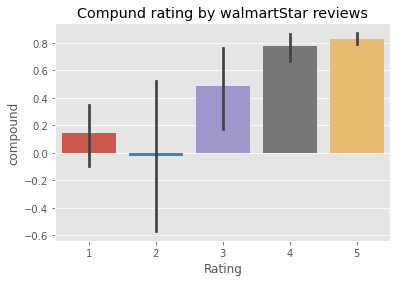

In [42]:
ax=sns.barplot(data=Vaders,x='Rating', y='compound')
ax.set_title('Compund rating by walmartStar reviews')
plt.show()

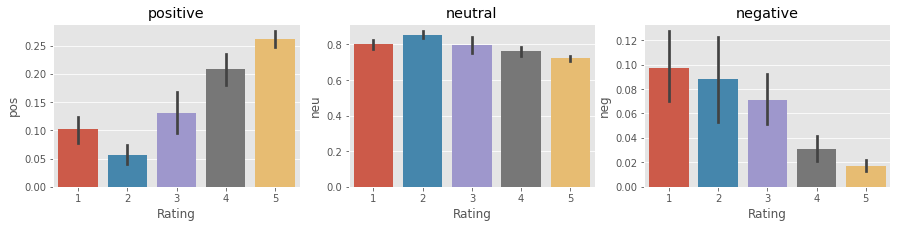

In [43]:
fig,axs=plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=Vaders, x='Rating',y='pos',ax=axs[0])
sns.barplot(data=Vaders, x='Rating',y='neu',ax=axs[1])
sns.barplot(data=Vaders, x='Rating',y='neg',ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('neutral')
axs[2].set_title('negative')
plt.show()

In [44]:
# pip install transformers
#!pip install tensorflow

In [45]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [46]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model= AutoModelForSequenceClassification.from_pretrained(MODEL)

In [47]:
print(example)
sia.polarity_scores(example)

great quality at a great price I have an older 36" Samsung  (2006 Touch Of Red model)  I wanted to replace.    Not because it didn't work but because I wanted a new modern smart TV Samsung builds TV's to last,  16 years is a long time for a TV hold up and keep working         
    Anyway A few weeks ago I purchased  a 43 inch Tu7000 for the bedroom.    I was seeking a thin modern affordable TV with a great picture    This was the ultimate choice!   I also find this model has decent internal sound,  without a soundbar   but of course you can always add one which I'll do soon to watch my music videos.  
.KateTheGreat00Written by aSamsung UScustomer


{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.9392}

In [48]:
#pip install numpy
#pip install --upgrade pip



In [49]:
encoded_text=tokenizer(example, return_tensors='pt')
output=model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict={
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.008853892, 'roberta_neu': 0.07393544, 'roberta_pos': 0.91721064}


In [50]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example, return_tensors='pt')
    output=model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict={
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
    }
    return scores_dict

In [51]:
res={}
for i,row in tqdm(df3.iterrows(),total=len(df3)):
    text=row['reviews']
    myid=row['Unnamed: 0']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"]=value
    roberta_result=polarity_scores_roberta(text)
    both={**vader_result,**roberta_result}
    res[myid]=both
    

  0%|          | 0/286 [00:00<?, ?it/s]

In [52]:
res

{0: {'neg': 0.036,
  'neu': 0.776,
  'pos': 0.188,
  'compound': 0.9364,
  'roberta_neg': 0.0052954056,
  'roberta_neu': 0.027127106,
  'roberta_pos': 0.96757746},
 1: {'neg': 0.042,
  'neu': 0.766,
  'pos': 0.191,
  'compound': 0.8373,
  'roberta_neg': 0.6193724,
  'roberta_neu': 0.29382458,
  'roberta_pos': 0.08680299},
 2: {'neg': 0.0,
  'neu': 0.85,
  'pos': 0.15,
  'compound': 0.8906,
  'roberta_neg': 0.0021306654,
  'roberta_neu': 0.018964142,
  'roberta_pos': 0.9789054},
 3: {'neg': 0.0,
  'neu': 0.74,
  'pos': 0.26,
  'compound': 0.9308,
  'roberta_neg': 0.006318841,
  'roberta_neu': 0.06472216,
  'roberta_pos': 0.9289591},
 4: {'neg': 0.0,
  'neu': 0.933,
  'pos': 0.067,
  'compound': 0.5423,
  'roberta_neg': 0.0022617453,
  'roberta_neu': 0.025899947,
  'roberta_pos': 0.9718383},
 5: {'neg': 0.0,
  'neu': 0.616,
  'pos': 0.384,
  'compound': 0.9713,
  'roberta_neg': 0.0014268348,
  'roberta_neu': 0.008038421,
  'roberta_pos': 0.9905345},
 6: {'neg': 0.0,
  'neu': 0.726,
  'po

In [53]:
# Vaders.head()

In [54]:
df3=df3.rename(columns={'Unnamed: 0':'Id'})

In [55]:
# df3.head()

In [56]:
# results_df.head()

In [57]:
df3['Rating'] = pd.to_numeric(df3['Rating'], errors='coerce')


In [58]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
# results_df=results_df.merge(df3,how='left')
results_df = results_df.merge(df3, how='left', on='Id')

In [59]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,reviews,Rating
0,0,0.036,0.776,0.188,0.9364,0.005295,0.027127,0.967577,"Great features, able to play Xbox without cons...",4
1,1,0.042,0.766,0.191,0.8373,0.619372,0.293825,0.086803,Black dot on screenJust purchase this tv and a...,1
2,2,0.000,0.850,0.150,0.8906,0.002131,0.018964,0.978905,TV is so simple to use. This Samsung Crystal U...,5
3,3,0.000,0.740,0.260,0.9308,0.006319,0.064722,0.928959,Incredible Ease of navigation For someone bein...,5
4,4,0.000,0.933,0.067,0.5423,0.002262,0.025900,0.971838,it connects so seamlessly with my samsung earb...,5


In [60]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,reviews,Rating
0,0,0.036,0.776,0.188,0.9364,0.005295,0.027127,0.967577,"Great features, able to play Xbox without cons...",4
1,1,0.042,0.766,0.191,0.8373,0.619372,0.293825,0.086803,Black dot on screenJust purchase this tv and a...,1
2,2,0.000,0.850,0.150,0.8906,0.002131,0.018964,0.978905,TV is so simple to use. This Samsung Crystal U...,5
3,3,0.000,0.740,0.260,0.9308,0.006319,0.064722,0.928959,Incredible Ease of navigation For someone bein...,5
4,4,0.000,0.933,0.067,0.5423,0.002262,0.025900,0.971838,it connects so seamlessly with my samsung earb...,5


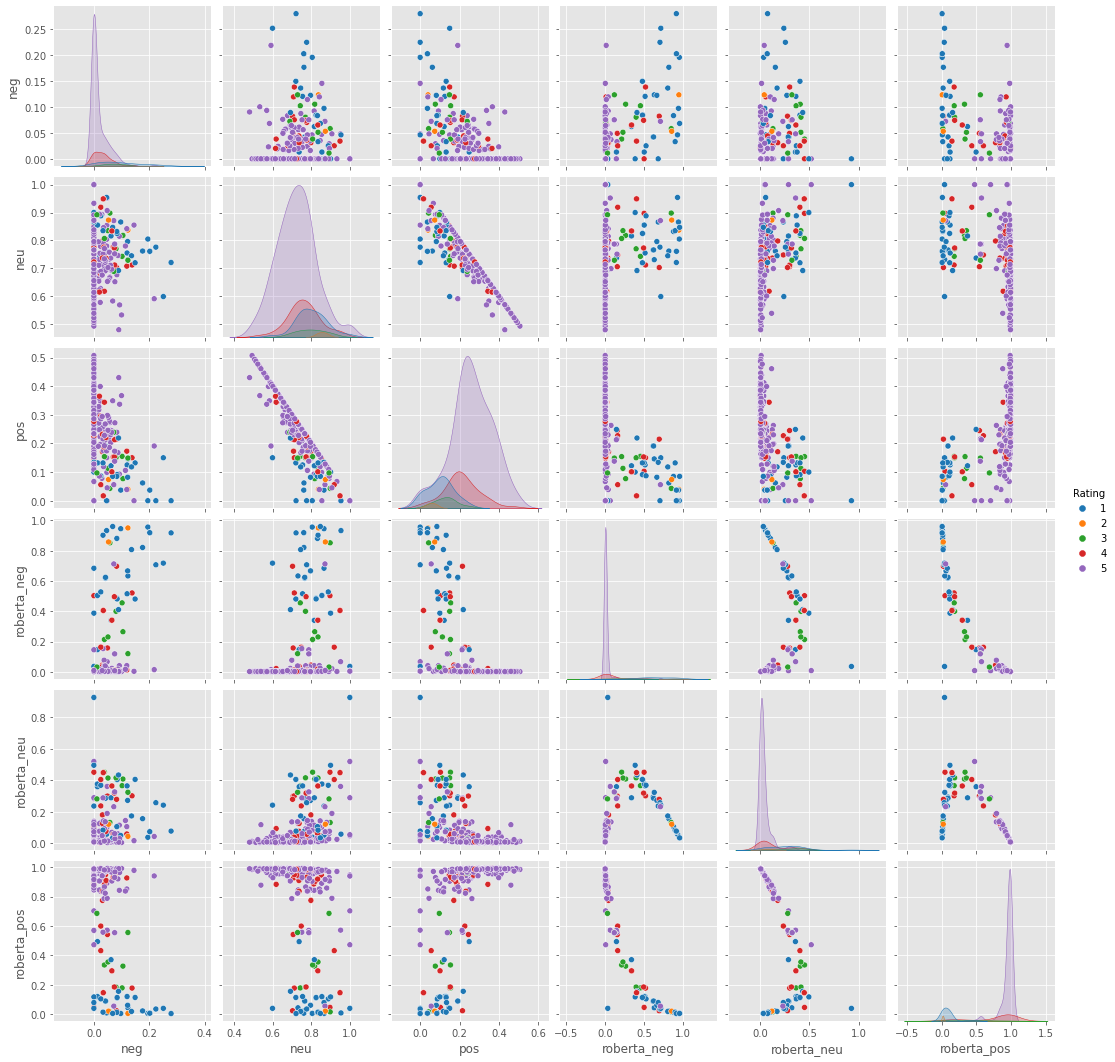

In [61]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos','roberta_neg', 'roberta_neu','roberta_pos'],
             hue='Rating',
             palette='tab10')
plt.show()

In [62]:
from transformers import pipeline

In [63]:
sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [64]:
sent_pipeline(example)

[{'label': 'NEGATIVE', 'score': 0.7467999458312988}]

In [65]:
sent_pipeline('how people can not like this product?')# some flaws....

[{'label': 'NEGATIVE', 'score': 0.9978952407836914}]